# Prep


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
import tensorflow_hub as hub


In [4]:
pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [5]:
print(tf.__version__)

2.15.0


In [6]:
print("yes" if tf.config.list_physical_devices('GPU') else "no")

no


# DATA PREP

In [7]:
import pandas as pd

In [8]:
labels = pd.read_csv("/content/drive/MyDrive/dog-vision/labels.csv")

In [9]:
len(labels)

10222

In [10]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


In [11]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


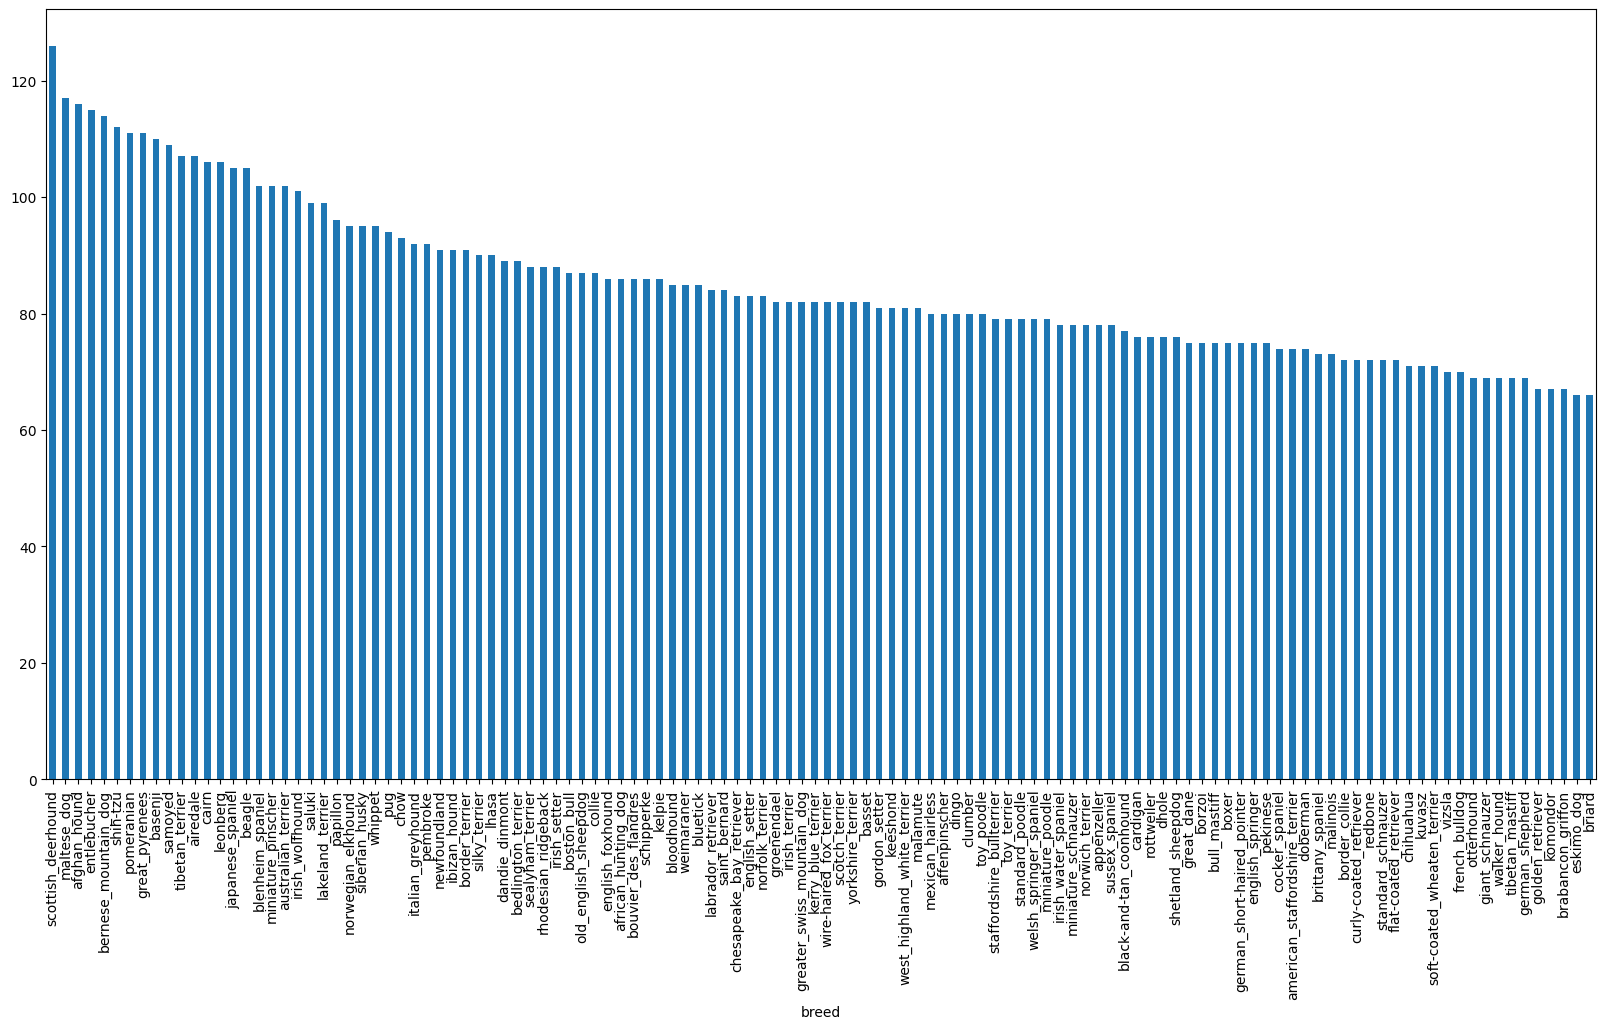

In [12]:
labels["breed"].value_counts().plot(kind="bar", figsize=(20,10));

In [13]:
from IPython.display import Image

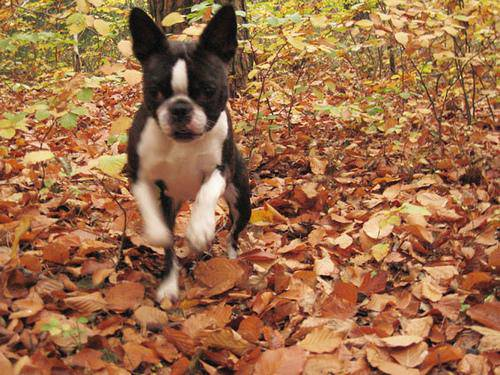

In [14]:
Image("drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [15]:
files = ["/content/drive/MyDrive/dog-vision/train/" + f + ".jpg" for f in labels["id"] ]

In [16]:
type(files)

list

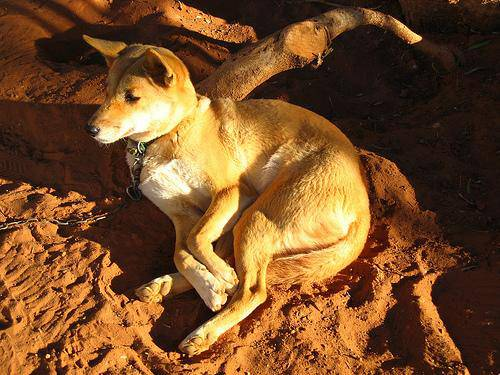

In [17]:
Image(files[1])

In [18]:
files[1:10]

['/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [19]:
len(files)

10222

In [20]:
import os
if len(os.listdir("drive/MyDrive/dog-vision/train/")) == len(files):
  print("Nothing is missing")
else:
  print("error")

Nothing is missing


In [21]:
len(os.listdir("drive/MyDrive/dog-vision/train/"))

10222

In [22]:
len(os.listdir("drive/MyDrive/dog-vision/test/"))

KeyboardInterrupt: 

In [ ]:
#!unzip "/content/drive/MyDrive/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog-vision"

In [ ]:
len(os.listdir("/content/drive/MyDrive/dog-vision/train"))

In [ ]:
print("nothing is missing" if len(os.listdir("/content/drive/MyDrive/dog-vision/train")) == len(files) else "error")

In [ ]:
Image(files[3150])

In [ ]:
labels["breed"][3150]

In [23]:
breeds = labels["breed"].to_numpy()

In [24]:
len(breeds)

10222

In [25]:
len(files)

10222

In [26]:
breeds[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
# breeds is an array containing all the names of the dog breeds and files is a list containing paths of dog images

In [27]:
import numpy as np
unique_breeds = np.unique(breeds)

In [28]:
import numpy as np

In [29]:
len(unique_breeds)

120

In [30]:
boolean_breeds = [breed == unique_breeds for breed in breeds ]

In [31]:
len(boolean_breeds)

10222

In [32]:
boolean_breeds[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
type(files)

In [ ]:
type(breeds)

In [ ]:
type(unique_breeds)

In [ ]:
type(boolean_breeds)

In [ ]:
print(breeds[0])#sample 1

In [ ]:
print(np.where(breeds[0]==unique_breeds))#position of this breed in unique breed

In [ ]:
print(boolean_breeds[0].astype(int))#checking that it is true at the same position specified in the above cell

In [ ]:
print(boolean_breeds[0].argmax())#returns maximum value in array, that is, 1, where the dog breed match is true

In [37]:
boolean_breeds[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [38]:
boolean_breeds_int = [arr.astype(int) for arr in boolean_breeds]

In [39]:
boolean_breeds_int[0].argmax()

19

In [40]:
#creating validation set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = files
y = boolean_breeds_int

In [43]:
#setting number of images to start experimenting
NUM_IMAGES = 1000  #@param {type: "slider", min: 1000, max: 10000, step: 1000}

In [44]:
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [45]:
len(x_train)

800

In [46]:
from matplotlib.pyplot import imread

In [47]:
files[0]

'/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

In [48]:
image = imread(files[0])

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]], dtype=uint8)
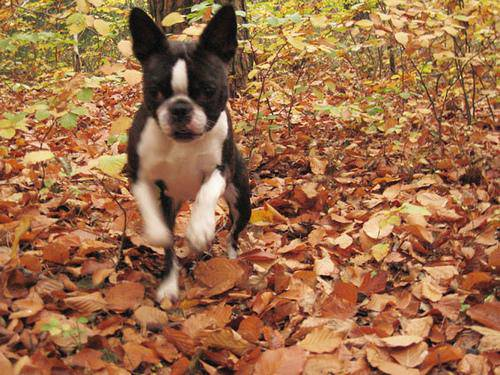

In [49]:
image

In [50]:
type(image)

numpy.ndarray

In [51]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [52]:
img2 = imread(files[21])

array([[[ 86,  99,  90],
        [ 87, 100,  91],
        [ 85, 101,  91],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]],

       [[ 81,  94,  85],
        [ 83,  96,  87],
        [ 83,  99,  89],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]],

       [[ 73,  86,  77],
        [ 77,  90,  81],
        [ 78,  94,  84],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]],

       ...,

       [[ 31,  80,  51],
        [ 38,  87,  58],
        [ 49,  98,  69],
        ...,
        [119, 168, 121],
        [117, 166, 121],
        [111, 160, 113]],

       [[ 40,  89,  60],
        [ 44,  93,  64],
        [ 49,  98,  69],
        ...,
        [117, 169, 120],
        [118, 170, 122],
        [112, 164, 115]],

       [[ 52, 101,  72],
        [ 50,  99,  70],
        [ 48,  97,  68],
        ...,
        [119, 171, 122],
        [126, 178, 129],
        [122, 174, 125]]], dtype=uint8)
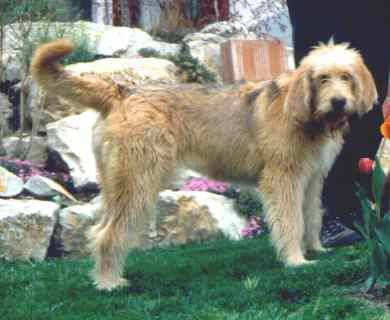

In [53]:
img2

In [54]:
tf.constant(img2)[:2]

<tf.Tensor: shape=(2, 390, 3), dtype=uint8, numpy=
array([[[ 86,  99,  90],
        [ 87, 100,  91],
        [ 85, 101,  91],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]],

       [[ 81,  94,  85],
        [ 83,  96,  87],
        [ 83,  99,  89],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]]], dtype=uint8)>

In [55]:
IMG_SIZE=224
def image_process(image_path):
  image = tf.io.read_file(image_path)#reads image file
  image = tf.image.decode_jpeg(image, channels=3)#converts jpeg to tensor
  image = tf.image.convert_image_dtype(image, tf.float32)#normalizing(scaling) instead of 0-255 to 0-1
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])#reshaping
  return image

In [56]:
def tf_tuple(image_path, label):
  image = image_process(image_path)
  return image,label

In [57]:
tf_tuple(x[0], y[0])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5705322 , 0.33588538, 0.15008473],
         [0.66901225, 0.46011657, 0.26022965],
         [0.61062384, 0.43763596, 0.21601713],
         ...,
         [0.8182312 , 0.7297958 , 0.26963907],
         [0.72454786, 0.6059109 , 0.2653059 ],
         [0.7494603 , 0.6252918 , 0.32456532]],
 
        [[0.6761415 , 0.4733761 , 0.3064293 ],
         [0.5672121 , 0.38192675, 0.20349538],
         [0.5883547 , 0.4322571 , 0.2403155 ],
         ...,
         [0.9326942 , 0.8260503 , 0.41093278],
         [0.86072475, 0.74250627, 0.3694122 ],
         [0.76781666, 0.6461604 , 0.29291284]],
 
        [[0.46350825, 0.29595745, 0.1536156 ],
         [0.42554107, 0.27039403, 0.12009467],
         [0.7887875 , 0.6547362 , 0.49015   ],
         ...,
         [0.89372385, 0.76964   , 0.41811958],
         [0.88609535, 0.7585918 , 0.36495727],
         [0.8243601 , 0.69494826, 0.2930575 ]],
 
        ...,
 
        [[0.7344025 , 0.4716574 

In [58]:
BATCH_SIZE=32
def create_data_batches( X, Y=None, batch_size=BATCH_SIZE, test_data=False, val_data=False ):
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(image_process).batch(BATCH_SIZE)
    return data_batch
  if val_data:
    print("Creating validation data batches.. ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y)))
    data_batch = data.map(tf_tuple).batch(batch_size)
    return data_batch
  else:
    print("Creating train data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(tf_tuple).batch(batch_size)
    return data_batch


In [59]:
train_data = create_data_batches(x_train, y_train)
valid_data = create_data_batches(x_val, y_val, val_data=True)

Creating train data batches..
Creating validation data batches.. 


In [60]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.int32, name=None))

In [61]:
valid_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.int32, name=None))

# MODEL BUILDING

In [62]:
IMG_SIZE

224

In [63]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]#batch, height, width, channels for input data

In [64]:
OUTPUT_SHAPE = len(unique_breeds)

In [65]:
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

In [66]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), #loss function
      optimizer=tf.keras.optimizers.Adam(), #optimization function
      metrics=["accuracy"] #we judge on the basis of accuracy metrics
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [ ]:
#model = create_model()
#model.summary()


# Creating Callbacks

In [ ]:
# We create 2 callbacks, one for tracking progress and one to stop it from overfitting

In [67]:
#loading tensorboard
%load_ext tensorboard
import datetime

In [68]:
def create_callback():
  logdir = os.path.join("/content/drive/MyDrive/dog-vision/logs", datetime.datetime.now().strftime("%y%m%d-%H%M%S"))#to enter logs in the directory on that time
  return tf.keras.callbacks.TensorBoard(logdir)

In [69]:
#early stopping callback: it stops training when model stops improving

In [70]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

# Training Deep Neural Network

In [ ]:
print("yes" if tf.config.list_physical_devices('GPU') else "no")

In [72]:
NUM_EPOCHS = 100

In [71]:
def train_model():
  model = create_model()
  tensorboard = create_callback()
  model.fit(x=train_data, validation_data=valid_data, epochs = NUM_EPOCHS, validation_freq=1, callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
#model=train_model()

In [ ]:
#accessing logs
#%tensorboard --logdir /content/drive/MyDrive/dog-vision/logs

# Predicting and visualizing

In [ ]:
predictions = model.predict(valid_data, verbose=1)
predictions

In [ ]:
index = 42
print("Max value: ", np.max(predictions[index]) )
print("Index of max value: ", np.argmax(predictions[index]))
print("Breed predicted: ", unique_breeds[np.argmax(predictions[index])])


In [111]:
#code for getting labels based on prediction probabilities:
def get_pred_label(pred_prob):
  return(unique_breeds[np.argmax(pred_prob)])

In [ ]:
pred_label = get_pred_label(predictions[0])
pred_label


In [ ]:
#unbatchifying validation data

In [ ]:
images_=[]
labels_=[]
def unbatchify(val_data):
  for images, labels in val_data.unbatch().as_numpy_iterator():
    images_.append(images)
    labels_.append(unique_breeds[np.argmax(labels)])
  return images_, labels_


In [ ]:
val_images, val_labels = unbatchify(valid_data)

In [ ]:
unique_breeds[np.argmax(val_labels[0])]#actual breed

In [ ]:
unique_breeds[np.argmax(predictions[0])]#predicted breed

In [ ]:
#so now we have: predicted labels-predictions, validation set labels and images- val_images, val_labels
type(predictions), type(val_labels), type(val_images)


In [73]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [74]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]#top 10 prediction prob index
  top_10_pred_values = pred_prob[top_10_pred_indexes]#top 10 prediction prob values
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]#their labels

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")#grey for predicted ones and green for the true label
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=14)

In [75]:
#combining above both functions:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

NameError: name 'plt' is not defined

# Saving and loading a trained model

In [76]:
def save_model(model, suffix=None):
  modeldir = os.path.join("/content/drive/MyDrive/dog-vision/models", datetime.datetime.now().strftime("Y%M%D-%h%m%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print("Saving model to: ", model_path)
  model.save(model_path)
  return model_path

In [77]:
def load_model(model_path):
  print("Loading model from: ", model_path)
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#save_model(model, suffix="1000-images-model")

In [ ]:
#load_1000_image_model=("/content/drive/MyDrive/dog-vision/models/Y3502/19/25-Feb021739968558-1000-images-model.h5")

# Training on full dataset

In [ ]:
len(x), len(y)

In [ ]:
full_data=create_data_batches(x[:5000],y[:5000])

In [ ]:
len(full_data)

In [ ]:
#full_model = create_model()

In [ ]:
#full_model_tensorboard = create_callback()

In [ ]:
#full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience = 3)

In [ ]:
#full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
#save_model(full_model, suffix="full-dataset-model")

In [ ]:
model = load_model("/content/drive/MyDrive/dog-vision/models/Y3502/19/25-Feb021739968558-1000-images-model.h5")

## Making test data predictions

In [88]:
test_path = "drive/MyDrive/dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]


In [ ]:
test_filenames[:5]

In [ ]:
len(test_filenames)

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

In [ ]:
preds = model.predict(test_data, verbose=1)

In [ ]:
np.savetxt("/content/drive/MyDrive/dog-vision/path.csv", preds, delimiter=',')

In [78]:
test_preds = np.loadtxt("/content/drive/MyDrive/dog-vision/test_preds.csv", delimiter=',')

In [80]:
test_preds[:1]

array([[1.59769537e-04, 1.66194490e-03, 2.00386334e-04, 1.23358055e-04,
        4.23015188e-03, 1.13759767e-02, 5.16515633e-04, 2.35859957e-03,
        1.46569014e-02, 1.06371511e-02, 9.39761230e-04, 5.45931272e-02,
        5.88324014e-03, 6.24130154e-03, 1.47910777e-03, 4.30710381e-03,
        1.70986878e-03, 4.82631789e-04, 3.24576802e-04, 7.44942809e-04,
        6.09466108e-04, 3.15724785e-04, 2.78197840e-04, 2.03065370e-04,
        1.34330010e-02, 1.41820768e-04, 9.89547480e-05, 2.24866695e-03,
        3.99443816e-04, 3.98732664e-04, 5.98033774e-04, 1.40198448e-04,
        1.71056919e-04, 1.03333476e-03, 7.57304544e-04, 5.20245114e-04,
        2.95101461e-04, 1.76852467e-04, 1.12925027e-03, 3.97121571e-02,
        2.14512530e-03, 2.55833787e-04, 5.91987967e-01, 1.87462458e-04,
        2.62660370e-03, 3.82920261e-05, 6.00930303e-04, 8.83288856e-04,
        9.48977657e-04, 4.17171279e-03, 1.68066402e-03, 2.16250963e-04,
        3.04944674e-03, 1.39793396e-01, 8.55231920e-05, 1.296858

## Preparing these test predictions to submit into kaggle
dataframe with column id and columns for each dog breed


In [85]:
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds))

In [90]:
test_ids=[fname for fname in os.listdir(test_path)]

In [91]:
test_ids[:2]

['e4413cd1ee44a05cc7991ae0d097b062.jpg',
 'de084b830010b6107215fef5d4a75b94.jpg']

In [92]:
test_ids = [x.replace(".jpg", "") for x in test_ids]

In [93]:
test_ids[:2]

['e4413cd1ee44a05cc7991ae0d097b062', 'de084b830010b6107215fef5d4a75b94']

In [94]:
preds_df["id"]=test_ids

In [96]:
preds_df[list(unique_breeds)]=test_preds

In [99]:
#preds_df.sample(1).T

In [101]:
preds_df.to_csv("/content/drive/MyDrive/dog-vision/model_submission.csv", index=False)

#  Predicting

In [102]:
testing_model = load_model("/content/drive/MyDrive/dog-vision/models/Y3502/19/25-Feb021739968558-1000-images-model.h5")

Loading model from:  /content/drive/MyDrive/dog-vision/models/Y3502/19/25-Feb021739968558-1000-images-model.h5


In [103]:
custom_path = "/content/drive/MyDrive/dog-vision/dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [104]:
custom_image_paths

['/content/drive/MyDrive/dog-vision/dog-photos/french-bulldog-1.jpg',
 '/content/drive/MyDrive/dog-vision/dog-photos/labrador-retriever-1.jpg',
 '/content/drive/MyDrive/dog-vision/dog-photos/golden-retriever-1.jpg',
 '/content/drive/MyDrive/dog-vision/dog-photos/poodle-1.jpg',
 '/content/drive/MyDrive/dog-vision/dog-photos/bulldog-1.jpg',
 '/content/drive/MyDrive/dog-vision/dog-photos/boxer-1.jpg']

In [105]:
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches..


In [106]:
custom_preds = testing_model.predict(custom_data)

1/1 [==============================] - 4s 4s/step


In [112]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [113]:
custom_pred_labels

['french_bulldog',
 'labrador_retriever',
 'golden_retriever',
 'miniature_poodle',
 'boxer',
 'boxer']

In [115]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)


In [117]:
import matplotlib.pyplot as plt


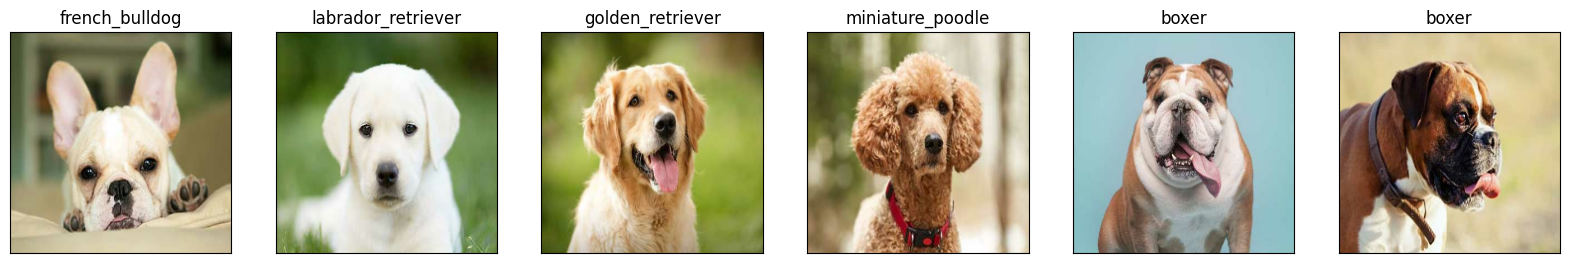

In [119]:
plt.figure(figsize=(20,20))
for i, image in enumerate(custom_images):
  plt.subplot(1, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)